<a href="https://colab.research.google.com/github/AnilKakkar76/CapstoneProject_CW-E/blob/main/Toronto_Server_File.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
### Importing  all Basic Commands
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import plotly.express as px
%matplotlib inline

In [ ]:
df = df = pd.read_excel("/content/IPT-results-2023-02-13-101322.xlsx")
df_mnsi = pd.read_excel('/content/MNSI.xlsx')
df_Rogers = pd.read_excel('/content/Rogers.xlsx')

In [ ]:
df

,Date,IP Address,Upload Speed (Mbps),Download Speed (Mbps),Ping (ms),Jitter,Server,IPV6 Supported,DNSSEC Resolved,Provider,Technology
0,"Feb 8, 2023, 2:56:35 PM",1x2.xxx.xxx.xxx,58.7,59.4,26.986,5.95,Toronto,0,0,MNSi,Fibre
1,"Feb 8, 2023, 3:01:34 PM",1x2.xxx.xxx.xxx,90.0,118.0,46.000,8.14,Toronto,0,0,MNSi,Fibre
2,"Feb 8, 2023, 3:06:34 PM",1x2.xxx.xxx.xxx,68.6,17.6,23.778,1.86,Toronto,0,0,MNSi,Fibre
3,"Feb 8, 2023, 3:11:34 PM",1x2.xxx.xxx.xxx,74.2,58.4,36.845,3.15,Toronto,0,0,MNSi,Fibre
4,"Feb 8, 2023, 3:16:35 PM",1x2.xxx.xxx.xxx,43.4,54.2,37.533,8.81,Toronto,0,0,MNSi,Fibre
...,...,...,...,...,...,...,...,...,...,...,...
295,"Feb 13, 2023, 10:41:22 AM",1x2.xxx.xxx.xxx,154.8,766.5,20.000,0.39,Toronto,0,0,MNSi,Fibre
296,"Feb 13, 2023, 10:36:20 AM",1x2.xxx.xxx.xxx,770.3,853.9,9.000,0.12,Toronto,0,0,MNSi,Fibre
297,"Feb 13, 2023, 10:31:20 AM",1x2.xxx.xxx.xxx,101.5,763.6,19.000,0.23,Toronto,0,0,MNSi,Fibre
298,"Feb 13, 2023, 10:26:20 AM",1x2.xxx.xxx.xxx,217.1,673.1,31.875,0.24,Toronto,0,0,MNSi,Fibre


In [ ]:

df = df.rename({'Upload Speed (Mbps)': 'Upload_Speed_Mbps', 'Download Speed (Mbps)': 'Download_Speed_Mbps','Ping (ms)':'Ping_ms'}, axis=1) 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Date                 300 non-null    object 
 1   IP Address           300 non-null    object 
 2   Upload_Speed_Mbps    300 non-null    float64
 3   Download_Speed_Mbps  300 non-null    float64
 4   Ping_ms              300 non-null    float64
 5   Jitter               300 non-null    float64
 6   Server               300 non-null    object 
 7   IPV6 Supported       300 non-null    int64  
 8   DNSSEC Resolved      300 non-null    int64  
 9   Provider             300 non-null    object 
 10  Technology           300 non-null    object 
dtypes: float64(4), int64(2), object(5)
memory usage: 25.9+ KB


In [ ]:
# Convert time column to datetime object
df['Date'] = pd.to_datetime(df['Date'])

# Extract time component from datetime object
df['Date_Only'] = df['Date'].dt.date
df['Time_Only'] = df['Date'].dt.time

In [ ]:
df.head(10)

,Date,IP Address,Upload_Speed_Mbps,Download_Speed_Mbps,Ping_ms,Jitter,Server,IPV6 Supported,DNSSEC Resolved,Provider,Technology,Date_Only,Time_Only
0,2023-02-08 14:56:35,1x2.xxx.xxx.xxx,58.7,59.4,26.986,5.95,Toronto,0,0,MNSi,Fibre,2023-02-08,14:56:35
1,2023-02-08 15:01:34,1x2.xxx.xxx.xxx,90.0,118.0,46.000,8.14,Toronto,0,0,MNSi,Fibre,2023-02-08,15:01:34
2,2023-02-08 15:06:34,1x2.xxx.xxx.xxx,68.6,17.6,23.778,1.86,Toronto,0,0,MNSi,Fibre,2023-02-08,15:06:34
3,2023-02-08 15:11:34,1x2.xxx.xxx.xxx,74.2,58.4,36.845,3.15,Toronto,0,0,MNSi,Fibre,2023-02-08,15:11:34
4,2023-02-08 15:16:35,1x2.xxx.xxx.xxx,43.4,54.2,37.533,8.81,Toronto,0,0,MNSi,Fibre,2023-02-08,15:16:35
5,2023-02-08 15:21:34,1x2.xxx.xxx.xxx,72.1,37.3,33.872,6.55,Toronto,0,0,MNSi,Fibre,2023-02-08,15:21:34
6,2023-02-08 15:26:34,1x2.xxx.xxx.xxx,31.3,19.4,22.344,44.34,Toronto,0,0,MNSi,Fibre,2023-02-08,15:26:34
7,2023-02-08 15:31:34,1x2.xxx.xxx.xxx,26.1,28.4,9.999,6.33,Toronto,0,0,MNSi,Fibre,2023-02-08,15:31:34
8,2023-02-08 15:36:34,1x2.xxx.xxx.xxx,73.1,42.9,11.487,10.51,Toronto,0,0,MNSi,Fibre,2023-02-08,15:36:34
9,2023-02-08 15:41:34,1x2.xxx.xxx.xxx,33.4,88.9,26.090,15.31,Toronto,0,0,MNSi,Fibre,2023-02-08,15:41:34


In [ ]:
# Drop columns col1 and col2
df = df.drop(['IP Address', 'IPV6 Supported',"DNSSEC Resolved"], axis=1)
# convert date only and time only column into corret formate for further use
df['Date_Only'] = pd.to_datetime(df['Date_Only'])
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Date                 300 non-null    datetime64[ns]
 1   Upload_Speed_Mbps    300 non-null    float64       
 2   Download_Speed_Mbps  300 non-null    float64       
 3   Ping_ms              300 non-null    float64       
 4   Jitter               300 non-null    float64       
 5   Server               300 non-null    object        
 6   Provider             300 non-null    object        
 7   Technology           300 non-null    object        
 8   Date_Only            300 non-null    datetime64[ns]
 9   Time_Only            300 non-null    object        
dtypes: datetime64[ns](2), float64(4), object(4)
memory usage: 23.6+ KB


In [ ]:
df.head(5)
df.isna().sum()

Date                   0
Upload_Speed_Mbps      0
Download_Speed_Mbps    0
Ping_ms                0
Jitter                 0
Server                 0
Provider               0
Technology             0
Date_Only              0
Time_Only              0
dtype: int64

Checking for duplicated values 

In [ ]:
df.duplicated().sum()


0

### **3 - Exploratory Data Analysis on IPT-Result-2023-02-13 data file**

Unique values for servers we have Three Servers lets check the count

In [ ]:
df.Server.value_counts()

Toronto      201
Vancouver     60
Montreal      39
Name: Server, dtype: int64

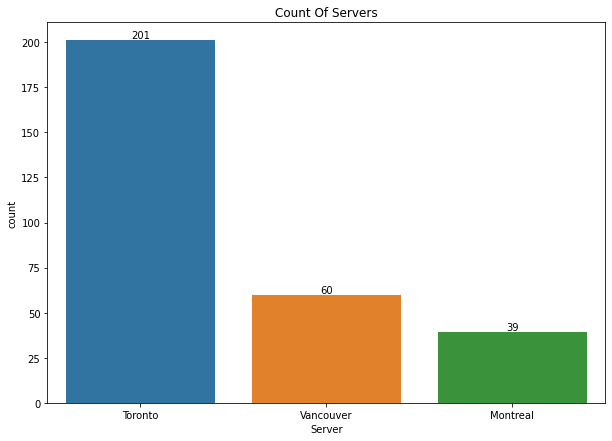

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.figure(figsize=(10, 7))
ax = sns.countplot(x='Server', data=df)
plt.title("Count Of Servers")
ax.bar_label(ax.containers[0])
plt.show()
plt.clf()

In [ ]:
print('The earliest start time is:')
print(df.Date.min())
print('The latest start time is:')
print(df.Date.max())

The earliest start time is:
2023-02-08 14:56:35
The latest start time is:
2023-02-13 11:01:35


In [ ]:
grouped_df = df.groupby(['Server',"Provider"]).Jitter.min()

grouped_df = pd.DataFrame(grouped_df)
grouped_df['Max_Jitter'] = df.groupby(['Server',"Provider"]).Jitter.max()
grouped_df['Mean_ Jitter'] = df.groupby(['Server',"Provider"]).Jitter.mean()
grouped_df

Jitter  Max_Jitter  Mean_ Jitter
Server    Provider                                  
Montreal  Bell        0.09        0.90      0.274211
          MNSi        0.23        0.23      0.230000
Toronto   Bell        0.02       31.88      0.968333
          MNSi        0.11       44.34      3.306222
Vancouver Bell        0.10        0.86      0.301042
          MNSi        0.09        0.47      0.229167

Jitter is a measure of the variation in latency over time, and it can affect the quality of real-time applications such as online gaming, video conferencing, and voice over IP (VoIP).

After analyzing the data, we can conclude that the average value of jitter is less in Montreal and higher in Toronto as compared to Vancouver. However, the user requests are more in Toronto server, which indicates that it may be more heavily utilized than the other servers.

Furthermore, we observed that the maximum jitter value from the Bell provider is less than MNSi, which is 31.88 overall. Therefore, if the user count is more, **Bell performs better than MNSi provider**.




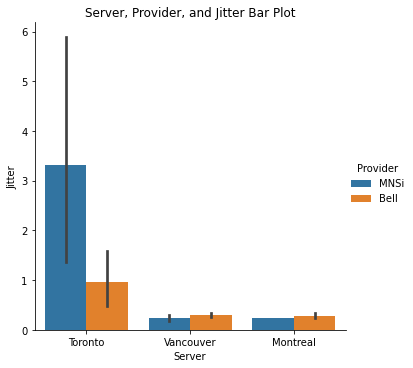

In [ ]:
ax = sns.catplot(data=df, x='Server', y='Jitter', hue='Provider', kind='bar')
plt.title('Server, Provider, and Jitter Bar Plot')
plt.xlabel('Server')
plt.ylabel('Jitter')
plt.show()

## Now checking ping in ms 

In [ ]:
Pinng_df = pd.DataFrame()
Pinng_df['Max_Ping_ms'] = df.groupby(['Server',"Provider"]).Ping_ms.max()
Pinng_df['Min_Ping_ms'] = df.groupby(['Server',"Provider"]).Ping_ms.min()
Pinng_df['Mean_Ping_ms'] = df.groupby(['Server',"Provider"]).Ping_ms.mean()

Pinng_df

Max_Ping_ms  Min_Ping_ms  Mean_Ping_ms
Server    Provider                                        
Montreal  Bell           38.102        12.00     23.791395
          MNSi           27.000        27.00     27.000000
Toronto   Bell           38.696         5.00     16.565891
          MNSi           46.000         5.00     19.369556
Vancouver Bell           71.000        62.00     66.540667
          MNSi           70.000        61.42     66.847417

For general web browsing, a ping time of 100 ms or less is considered good. For online gaming or real-time applications like video conferencing, a ping time of 50 ms or less is generally recommended for the best experience.
When it comes to server performance, Toronto and Montreal outperform Vancouver. In terms of ping, **Bell stands out as the provider offering excellent user experience**.



# **Let's analized the Downloading and Uploading Speed**


In [ ]:
UP_D_df = pd.DataFrame()
UP_D_df['Max_Down_Speed_Mbps'] = df.groupby(['Server',"Provider"]).Download_Speed_Mbps.max()
UP_D_df['Min_Down_Speed_Mbps'] = df.groupby(['Server',"Provider"]).Download_Speed_Mbps.min()
UP_D_df['Max_Upload_Speed_Mbps'] = df.groupby(['Server',"Provider"]).Upload_Speed_Mbps.max()
UP_D_df['Min_Upload_Speed_Mbps'] = df.groupby(['Server',"Provider"]).Upload_Speed_Mbps.min()
UP_D_df

Max_Down_Speed_Mbps  Min_Down_Speed_Mbps  \
Server    Provider                                             
Montreal  Bell                    883.0                495.6   
          MNSi                    745.6                745.6   
Toronto   Bell                    924.9                 23.2   
          MNSi                    911.4                 17.6   
Vancouver Bell                    371.0                261.9   
          MNSi                    381.3                265.3   

                    Max_Upload_Speed_Mbps  Min_Upload_Speed_Mbps  
Server    Provider                                                
Montreal  Bell                      605.4                   13.9  
          MNSi                      456.0                  456.0  
Toronto   Bell                      816.9                   28.1  
          MNSi                      803.0                   26.1  
Vancouver Bell                      333.3                   48.8  
          MNSi                      333.4                   76.0

In [ ]:
Mean_UP_D_Speed = pd.DataFrame()
Mean_UP_D_Speed['Mean_Down_Speed_Mbps'] = df.groupby(['Server',"Provider"]).Download_Speed_Mbps.mean()
Mean_UP_D_Speed['Mean_Upload_Speed_Mbps'] = df.groupby(['Server',"Provider"]).Upload_Speed_Mbps.mean()
Mean_UP_D_Speed

Mean_Down_Speed_Mbps  Mean_Upload_Speed_Mbps
Server    Provider                                              
Montreal  Bell                692.389474              333.434211
          MNSi                745.600000              456.000000
Toronto   Bell                738.801923              470.017949
          MNSi                593.057778              315.648889
Vancouver Bell                329.879167              159.852083
          MNSi                306.383333              143.516667

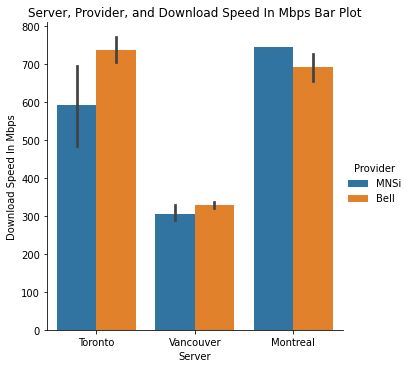

In [ ]:
ax = sns.catplot(data=df, x='Server', y='Download_Speed_Mbps', hue='Provider', kind='bar')
plt.title('Server, Provider, and Download Speed In Mbps Bar Plot')
plt.xlabel('Server')
plt.ylabel('Download Speed In Mbps')
plt.show()

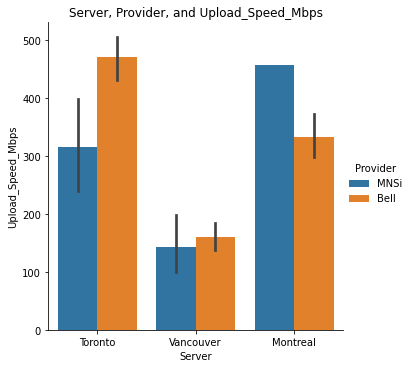

In [ ]:
ax = sns.catplot(data=df, x='Server', y='Upload_Speed_Mbps', hue='Provider', kind='bar')
plt.title('Server, Provider, and Upload_Speed_Mbps')
plt.xlabel('Server')
plt.ylabel('Upload_Speed_Mbps')
plt.show()

Toronto server appears to be providing the best service compared to the other two servers, despite having a higher user count. When comparing the providers, Bell offers better downloading and uploading speeds compared to MNSi. Therefore, **we recommend using the Toronto server with Bell as the provider for optimal performance.**